In [ ]:
# import libaries

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pysr
from sympy import *

%matplotlib inline

: 

In [ ]:
# import pysr model from pickle file "pysr_model.pkl"
import pickle
with open('pysr_model.pkl', 'rb') as f:
    model = pickle.load(f)

: 

In [3]:
print(model.equations_.equation)

0                                            -2.7524877
1                                      (-3.984053 + x0)
2                                  (cos(x0) * -9.57324)
3                           (sin(cos(x0)) * -10.162861)
4                    (sin(x0 * 2.0796967) * -6.0662985)
5             (sin(x0 * 2.1036406) * (-7.1949797 + x0))
6         ((exp(sin(x0 + x0)) * -4.638474) + 5.9488344)
7     ((sin((0.9491806 + x0) * x0) * -5.2589025) + -...
8     (sin(x0 * (0.78438604 + x0)) * (-7.017297 + (x...
9     ((sin(x0 * (0.78438604 + x0)) * (-7.017297 + (...
10    (sin(x0 * (x0 + cos(cos(-5.441252)))) * (-6.93...
11    (sin(x0 * (0.78438604 + x0)) * ((-7.017297 + (...
12    (sin(x0 * (x0 + cos(cos(sin(sin(x0 + 0.3875205...
13    (sin(x0 * ((x0 * 0.96004725) + cos(cos(sin(x0 ...
Name: equation, dtype: object


In [ ]:
# change matplotlib properties to make it look better
# Set font sizes for different plot elements
plt.rc('font', size=16)          # Base font size for text elements
plt.rc('axes', titlesize=18)     # Title font size
plt.rc('axes', labelsize=16)     # Axis label font size
plt.rc('xtick', labelsize=14)    # X-axis tick label font size
plt.rc('ytick', labelsize=14)    # Y-axis tick label font size
plt.rc('legend', fontsize=14)    # Legend font size
# Set line widths for different plot elements
plt.rc('axes', linewidth=1.5)    # Width of axis lines
plt.rc('lines', linewidth=3)     # Width of plot lines
plt.rc('lines', markersize=8)    # Size of plot markers
plt.rc('xtick.major', width=1.5) # Width of tick mark lines
plt.rcParams["text.usetex"] = False


: 

In [ ]:
# Dataset
N = 10
np.random.seed(0)
X = np.random.uniform(0, 2, size=(N, 1))
y = 5 * np.cos(3.5 * X) - 1.3

# generate data set
X_big = np.linspace(0, 2, 1000).reshape(-1, 1)

# plot the pareto front on the left plot and the equations on the right plot and the equations in the middle plot
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 5))
ax3.scatter(X, y, label='labeled data', color='k', zorder=10, marker='x', s=60)
for i in range(len(model.equations)):
    if i > 5:
        break
    ax3.plot(X_big, model.predict(X_big, i).reshape(-1, 1), zorder=(5 if i == np.argmax(model.equations_.score) else 0))
# plot pareto front for the first 6 equations
complexities = model.equations_.complexity[0:6]
losses = model.equations_.loss[0:6]
# plot pareto front with "parsimony" on the x-axis (-complexity) and "accuracy" on the y-axis (-log(loss))
# color the points according to the order in which they were added to the pareto front
# use same color scheme as in the right plot
colors = [plt.cm.tab10(i) for i in np.arange(len(losses))]
ax1.step(-complexities, -np.log(losses), c='k', where='post')
# add white outline to the points
ax1.scatter(-complexities, -np.log(losses), c=colors, zorder=10, s=150, edgecolor='white', linewidth=3)
# draw a vertical line trough the point with the highest score
#ax1.axvline(-complexities[np.argmax(model.equations_.score)], c='r', ls='--', label='best candidate')
# draw a arrow to the point with the highest score
ax1.annotate('best candidate', (-complexities[np.argmax(model.equations_.score)]+0.05,
                                 -np.log(losses[np.argmax(model.equations_.score)]-0.05)),
             xytext=(-complexities[np.argmax(model.equations_.score)]+0.1,
                      -np.log(losses[np.argmax(model.equations_.score)]-0.30)),
             arrowprops=dict(facecolor='black', shrink=0.0, width=1, headwidth=10, edgecolor='black'),
             zorder=10,
             )



ax1.set_xlabel('parsimony [-complexity]')
ax1.set_ylabel('accuracy [-log(loss)]')
ax1.set_title('Pareto front')
#ax1.legend()
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Pareto front equations plotted')
ax3.legend()
#plt.legend()
plt.tight_layout(pad=0.0)
plt.show()

# get current figure and save it
# no transparency
#fig = plt.gcf()
fig.savefig('plots/pareto_front_example.jpg', dpi=100, bbox_inches='tight', pad_inches=0.0, transparent=False)


# round the constants of the equations to 2 decimal places
# use sympy to parse the equations

# for a in preorder_traversal(ex1):
#   if isinstance(a, Float):
#       ex2 = ex2.subs(a, round(a, 1))

# eqs = [sympy.sympify(eq) for eq in model.equations_.equation[0:6]]
# rounded_expr = []
# for eq in eqs:
#     for a in preorder_traversal(eq):
#         if isinstance(a, Float):
#             eq = eq.subs(a, round(a, 1))
#     rounded_expr.append(sympy.latex(eq))


# # write the equations in the middle plot with their respective color
# for i in range(len(model.equations)):
#     if i > 5:
#         break
#     # show as latex
#     ax2.text(0.5, 0.95-i*0.1, rounded_expr[i], fontsize=12, color=colors[i])
# print(eqs)
# print(rounded_expr)

: 

## Pareto front: Score

In [ ]:
print(model)

: 

In [ ]:
# the score S of an equation is given by S=-(\Delta log(loss)/\Delta complexity). The Delta is calculated by subtracting it from the previous value.

complexities = model.equations_.complexity[0:6]
losses = model.equations_.loss[0:6]



s_scores = []

for i in range(1, len(losses)):
    d_losses = np.log(losses[i]/losses[i-1])
    d_complexities = complexities[i] - complexities[i-1]
    score = -d_losses/d_complexities
    s_scores.append(score)

s_scores = np.array(s_scores)

# plot pareto front with slopes between points
plt.figure(figsize=(7,7))

colors = [plt.cm.tab10(i) for i in np.arange(len(losses))]
plt.step(-complexities, -np.log(losses), c='k', where='post')
# add white outline to the points
plt.scatter(-complexities, -np.log(losses), c=colors, zorder=10, s=150, edgecolor='white', linewidth=3)

# transform the array complexities to - complexities
complexities = -complexities
losses = -np.log(losses)

# plot slopes between points
for i in range(len(s_scores)):
    plt.plot([complexities[i], complexities[i+1]], [losses[i], losses[i+1]], color='grey', linestyle='solid', label='Slope (S)')
    plt.text(complexities[i+1]+0.15, losses[i+1]+0.05, str(round(s_scores[i], 2)), color='black' if s_scores[i] != np.max(s_scores) else 'red', fontsize=16)

# color the highest slope red
plt.plot([complexities[1], complexities[2]], [losses[1], losses[2]], color='red', linestyle='solid')

# add text in plot explaining the slopes as the score in latex
plt.text(0.05, 0.5, r'$S = -\frac{\Delta log(loss)}{\Delta complexity}$', fontsize=24, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# remove all but one legend entry
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), ['Slope (-S)'], loc='upper right', fontsize=16)

plt.xlabel('parsimony [-complexity]')
plt.ylabel('accuracy [-log(loss)]')

plt.title('Pareto front with slopes between points')
plt.tight_layout()

# save figure
plt.savefig('plots/pareto_front_slope.jpg', dpi=100, bbox_inches='tight')

: 

## MoD: all vs best

In [ ]:
from matplotlib.lines import Line2D
# calculate the std of all predictions for every value of X_big
y_pred_all = np.array([model.predict(X_big, i) for i in range(len(model.equations[:6]))])
# cut the equations up to the equation with the best score
y_pred_cut = y_pred_all[np.argmax(model.equations_.score):6, :]
y_pred_std_all = np.std(y_pred_all, axis=0)
y_pred_std_cut = np.std(y_pred_cut, axis=0)

# calculate the true values for every value of X_big. y=5*cos(3.5*x) - 1.3
true_y = 5 * np.cos(3.5 * X_big) - 1.3

# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=False, gridspec_kw={'height_ratios': [3, 1]})

# Plot data on the top-left subplot
for i in range(y_pred_all.shape[0]):
    axes[0, 0].plot(X_big, y_pred_all[i, :], color='grey', alpha=0.5)
axes[0, 0].scatter(X, y, color='black', label='Labeled data', zorder=10)
axes[0, 0].plot(X_big, true_y, color='red', label='True Equation')
axes[0, 0].set_ylabel('y')

# Manually create a dummy gray line for the legend
dummy_line = Line2D([0], [0], color='gray', label='Committee')

handles, labels = axes[0, 0].get_legend_handles_labels()
# Add the dummy line to the legend with the other lines
handles.append(dummy_line)
labels.append('Committee')
axes[0, 0].legend(handles, labels, fontsize=12)


#axes[0, 0].legend()
axes[0, 0].set_title('All Equations (Plot + MoD)')

# Plot data on the top-right subplot
for i in range(y_pred_cut.shape[0]):
    axes[0, 1].plot(X_big, y_pred_cut[i, :], color='grey', alpha=0.5)
axes[0, 1].scatter(X, y, color='black', label='Labeled data', zorder=10)
axes[0, 1].plot(X_big, true_y, color='red', label='True Equation')
axes[0, 1].set_ylabel('')
handles, labels = axes[0, 1].get_legend_handles_labels()
# Add the dummy line to the legend with the other lines
handles.append(dummy_line)
labels.append('Committee')
axes[0, 1].legend(handles, labels, fontsize=12)
axes[0, 1].set_title('Best Equations (Plot + MoD)')

# Plot data on the bottom-left subplot
axes[1, 0].plot(X_big, y_pred_std_all, label='MoD')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_yticks([])
axes[1, 0].set_ylabel('')
axes[1, 0].legend()

# Plot data on the bottom-right subplot
axes[1, 1].plot(X_big, y_pred_std_cut, label='MoD')
axes[1, 1].set_xlabel('x')
# not y ticks and labels
axes[1, 1].set_yticks([])
axes[1, 1].set_ylabel('')
axes[1, 1].legend()

# Adjust layout to make the plots touch and avoid overlapping ticks
plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0.2)


# Display the plot
plt.show()
plt.draw()

# Save the plot
#fig = plt.gcf()
fig.savefig('plots/MoD_all_vs_best.jpg', dpi=100, bbox_inches='tight', pad_inches=0.0, transparent=False)


: 

## QBC: 4 steps plot

In [82]:
# calculate the x value of the maximum of the MoD

max_mod = X_big[np.argmax(y_pred_std_cut)]

print('max_mod_cut: ', max_mod)

max_mod_cut:  [0.]


0    0.000000
1    0.493241
2    2.308598
3         inf
Name: score, dtype: float64
(2, 1000)


/beegfs/desy/user/bornemaf/conda/envs/PySR/lib/python3.10/site-packages/pysr/sr.py:1186: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (1000, 1) and (2, 1000)

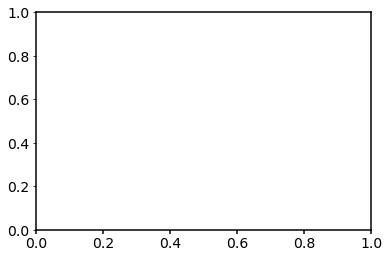

In [121]:
# import pysr model from pickle file "pysr_model.pkl"
import pickle
with open('models/pysr_model_2.pkl', 'rb') as f:
    model_new = pickle.load(f)
# calculate the new mod

print(model_new.equations_.score)

y_pred_all = np.array([model_new.predict(X_big, i) for i in range(len(model_new.equations))])
# cut the equations up to the equation with the best score
y_pred_cut = y_pred_all[2:6, :]
print(y_pred_cut.shape)
y_pred_std_cut = np.std(y_pred_cut, axis=0)

# plot the new mod
#plt.plot(X_big, y_pred_std_cut, label='new mod')
plt.plot(X_big, y_pred_cut, label='new mod')

max_mod = X_big[np.argmax(y_pred_std_cut)]

print('max_mod_cut: ', max_mod)

/beegfs/desy/user/bornemaf/conda/envs/PySR/lib/python3.10/site-packages/pysr/sr.py:1186: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(
/beegfs/desy/user/bornemaf/conda/envs/PySR/lib/python3.10/site-packages/pysr/sr.py:1186: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(
/beegfs/desy/user/bornemaf/conda/envs/PySR/lib/python3.10/site-packages/pysr/sr.py:1186: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(
/beegfs/desy/user/bornemaf/conda/envs/PySR/lib/python3.10/site-packages/pysr/sr.py:1186: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


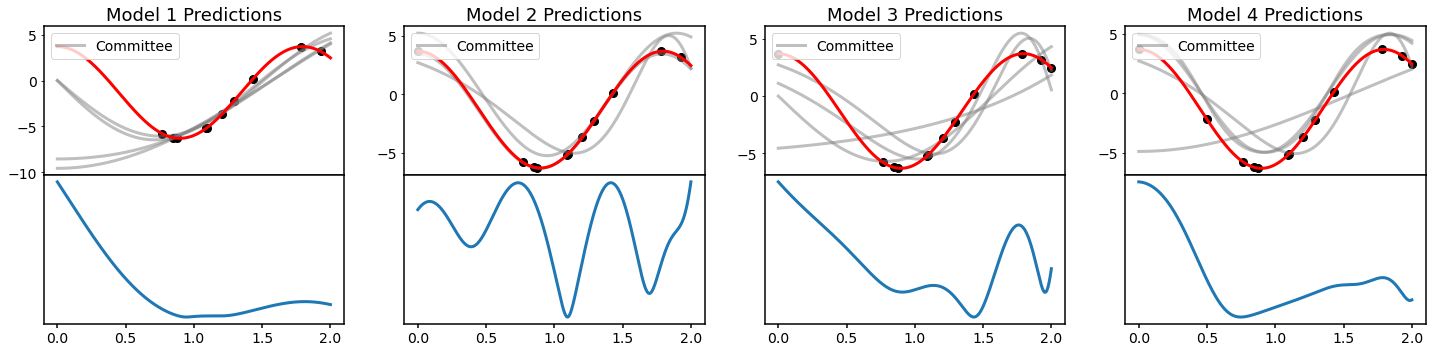

In [120]:
def plot_all_4_models():
    X_new = np.copy(X)
    # Load all models
    model1 = pickle.load(open('models/pysr_model_10.pkl', 'rb'))
    model2 = pickle.load(open('models/pysr_model_11.pkl', 'rb'))
    model3 = pickle.load(open('models/pysr_model_12.pkl', 'rb'))
    model4 = pickle.load(open('models/pysr_model_13.pkl', 'rb'))
    points = [0.0, 2.0, 0.5]
    models_equations = [(2,6), (3,6), (2,6), (2,6)]
    
    # Create a 2x4 grid of subplots
    fig, ax = plt.subplots(2, 4, figsize=(20, 5))
    
    # Loop through each model
    for i, model_i in enumerate([model1, model2, model3, model4]):
        if i > 0:
            X_new = np.vstack((X_new, points[i-1]))
        y_new = 5 * np.cos(3.5 * X_new) - 1.3
        y_pred_all = np.array([model_i.predict(X_big, i) for i in range(len(model_i.equations))])
        y_pred_cut = y_pred_all[models_equations[i][0]:models_equations[i][1], :]
        y_pred_std_cut = np.std(y_pred_cut, axis=0)
        true_y = 5 * np.cos(3.5 * X_big) - 1.3
        
        # Plot predictions in the top row
        for j in range(y_pred_cut.shape[0]):
            ax[0, i].plot(X_big, y_pred_cut[j, :], color='gray', alpha=0.5)
        ax[0, i].plot(X_big, true_y, color='red')
        ax[0, i].scatter(X_new, y_new, color='black')
        ax[0, i].set_title(f'Model {i+1} Predictions')

        # Plot standard deviations in the bottom row
        ax[1, i].plot(X_big, y_pred_std_cut)
        ax[1, i].set_yticks([])
        ax[1, i].set_ylabel('')

        # Manually create a dummy gray line for the legend
        dummy_line = Line2D([0], [0], color='gray', alpha=0.5, label='Committee')
        ax[0, i].legend(handles=[dummy_line], loc='upper left')

    # Adjust layout to make the plots touch and avoid overlapping ticks
    plt.tight_layout()
    fig.subplots_adjust(hspace=0, wspace=0.2)

    # Save the plot
    fig.savefig('MoD_all_vs_best.jpg', dpi=150, bbox_inches='tight', pad_inches=0.1)

    plt.show()

plot_all_4_models()


In [54]:
print(pysr.__version__)

0.16.0


In [1]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_file = '/beegfs/desy/user/bornemaf/data/SyReAL/notebooks/FeynmanEquations.csv'  # Replace with your CSV file's path
df = pd.read_csv(csv_file)

# Generate LaTeX tabular code
latex_tabular = df.to_latex(index=False, escape=False)

# save to file
with open('plots/FeynmanEquations.tex', 'w') as f:
    f.write(latex_tabular)



/tmp/ipykernel_64941/1154791122.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_tabular = df.to_latex(index=False, escape=False)


In [12]:
import pandas as pd
from sympy import latex, sympify


#csv_file = 'data.csv'  # Replace with your CSV file's path

excluded_columns = ['datapoints', 'Number', 'Output', 'v1_name', 'v1_low', 'v1_high', 'v2_name', 'v2_low', 'v2_high', 'v3_name', 'v3_low', 'v3_high', 'v4_name', 'v4_low', 'v4_high', 'v5_name', 'v5_low', 'v5_high', 'v6_name', 'v6_low', 'v6_high', 'v7_name', 'v7_low', 'v7_high', 'v8_name', 'v8_low', 'v8_high', 'v9_name', 'v9_low', 'v9_high', 'v10_name', 'v10_low', 'v10_high']
df = pd.read_csv(csv_file)

# rename '#variables' column to 'variables'
df = df.rename(columns={'# variables': 'variables'})

# Remove excluded columns
df = df.drop(columns=excluded_columns)

# add dollar signs to each column
for col in df.columns:
    df[col] = df[col].apply(lambda x: '$' + str(x) + '$')


# Generate LaTeX tabular code
latex_tabular = df.to_latex(index=False, escape=False, column_format='|' + 'c|' * len(df.columns))

# Print the LaTeX tabular code
print(latex_tabular)

# Write the LaTeX tabular code to a file

# save to file
with open('plots/FeynmanEquations1.tex', 'w') as f:
    f.write(latex_tabular)



\begin{tabular}{|c|c|c|}
\toprule
   Filename &                                            Formula & variables \\
\midrule
   $I.6.2a$ &                      $exp(-theta**2/2)/sqrt(2*pi)$ &       $1$ \\
    $I.6.2$ &      $exp(-(theta/sigma)**2/2)/(sqrt(2*pi)*sigma)$ &       $2$ \\
   $I.6.2b$ & $exp(-((theta-theta1)/sigma)**2/2)/(sqrt(2*pi)*... &       $3$ \\
   $I.8.14$ &                      $sqrt((x2-x1)**2+(y2-y1)**2)$ &       $4$ \\
   $I.9.18$ &       $G*m1*m2/((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)$ &       $9$ \\
   $I.10.7$ &                            $m_0/sqrt(1-v**2/c**2)$ &       $3$ \\
  $I.11.19$ &                                $x1*y1+x2*y2+x3*y3$ &       $6$ \\
   $I.12.1$ &                                            $mu*Nn$ &       $2$ \\
   $I.12.2$ &                      $q1*q2*r/(4*pi*epsilon*r**3)$ &       $4$ \\
   $I.12.4$ &                         $q1*r/(4*pi*epsilon*r**3)$ &       $3$ \\
   $I.12.5$ &                                            $q2*Ef$ &       $2$ 

/tmp/ipykernel_64941/2645383345.py:22: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_tabular = df.to_latex(index=False, escape=False, column_format='|' + 'c|' * len(df.columns))


In [4]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
#csv_file = 'data.csv'  # Replace with your CSV file's path
df = pd.read_csv(csv_file)

# Identify the column with the problematic equation
error_equation_column = 'Formula'  # Replace with the column name containing the equation causing the error

# Print the equations causing the error
error_equations = df[df[error_equation_column].apply(lambda eq: isinstance(eq, str) and 'Symbol' in eq)]
for idx, eq in error_equations.iterrows():
    print(f"Row {idx}: {eq[error_equation_column]}")


In [14]:
#Read FeynmanEquations.tex file and replace all '**' with '^'
with open('plots/FeynmanEquations.tex', 'r') as file :
    filedata = file.read()
filedata = filedata.replace('**', '^')
# Write the file out again
with open('plots/FeynmanEquations2.tex', 'w') as file: 
    file.write(filedata)

In [28]:
path = "/beegfs/desy/user/bornemaf/data/SyReAL/syreal/jobs/jobOrchestration/feynman_info.json"

# from this, export latex table with the index as the first column and the 'found' row as the second column

found_i = ['II.11.17', 'I.24.6', 'II.11.20', 'III.13.18', 'I.13.4', 'I.6.2b',
       'I.30.3', 'II.11.3', 'I.34.14', 'I.11.19', 'I.38.12', 'III.7.38',
       'III.10.19', 'I.6.2', 'I.27.6', 'I.12.2', 'III.15.12', 'II.34.2a',
       'I.40.1', 'II.6.11', 'I.12.11', 'III.19.51', 'I.18.4', 'I.6.2a',
       'II.34.11', 'II.6.15b', 'I.8.14', 'II.11.28', 'II.34.29b', 'I.10.7',
       'I.32.5', 'I.16.6', 'II.35.18', 'I.13.12', 'II.36.38', 'I.37.4',
       'II.2.42', 'II.21.32', 'III.14.14', 'II.35.21', 'III.15.14', 'I.50.26']


import json
import pandas as pd

with open(path) as f:
    data = json.load(f)

keys = list(data.keys())

# for every key, check if the key is in found_i, if so append true to found, else false

found = []
for key in keys:
    if key in found_i:
        found.append(True)
    else:
        found.append(False)

# the amount of found solutions
print(sum(found))


# make a dataframe
df = pd.DataFrame({'Filename': keys, 'Found': found})

# export to latex
print(df.to_latex(index=False))

# export to tex
with open("plots/found.tex", "w") as f:
    f.write(df.to_latex(index=False))


42
\begin{tabular}{ll}
\toprule
 Filename &  Found \\
\midrule
III.17.37 &  False \\
 II.13.17 &  False \\
  I.39.11 &  False \\
  I.47.23 &  False \\
  I.43.43 &  False \\
 III.4.32 &  False \\
 II.11.17 &   True \\
  II.8.31 &  False \\
 II.13.34 &  False \\
   I.24.6 &   True \\
  II.10.9 &  False \\
  I.41.16 &  False \\
III.21.20 &  False \\
 II.11.20 &   True \\
  II.37.1 &  False \\
III.13.18 &   True \\
   I.13.4 &   True \\
  II.3.24 &  False \\
   I.14.4 &  False \\
  I.25.13 &  False \\
II.34.29a &  False \\
   I.34.8 &  False \\
   I.12.5 &  False \\
   I.6.2b &   True \\
   I.12.1 &  False \\
   I.30.3 &   True \\
  II.11.3 &   True \\
  II.15.5 &  False \\
  I.34.14 &   True \\
  I.11.19 &   True \\
  I.38.12 &   True \\
 III.7.38 &   True \\
   I.34.1 &  False \\
III.10.19 &   True \\
   II.8.7 &  False \\
 II.6.15a &  False \\
    I.6.2 &   True \\
   I.39.1 &  False \\
   I.27.6 &   True \\
   I.12.2 &   True \\
   I.48.2 &  False \\
III.15.12 &   True \\
III.15.27 &  

/tmp/ipykernel_64941/2317470436.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))
/tmp/ipykernel_64941/2317470436.py:43: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df.to_latex(index=False))
